# Using Random Forest Algolithm to Predict Rent 

## Install Dependancies

In [598]:
# Install pandas for data manipulation
%pip install pandas

# Install numpy for numerical operations
%pip install numpy

# Install matplotlib for data visualization
%pip install matplotlib

# Install seaborn for statistical data visualization
%pip install seaborn

# Install scikit-learn for machine learning algorithms and model evaluation
%pip install scikit-learn

#Install widgets for UI
%pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importing Libralies 

In [599]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import ipywidgets as widgets


## Read CSV

In [600]:
file_path = 'apartments_for_rent_classified_100K.csv'
df = pd.read_csv(file_path, sep=";", encoding='ISO-8859-1')
print(df.head())

           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN        1.0   
4  This unit is located at 4805 Marquette NE, Alb...       NaN        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       1.0      USD  

C:\Users\ureka\AppData\Local\Temp\ipykernel_3320\782402179.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding='ISO-8859-1')


### Checking column 15

In [601]:
sample_entries = df.iloc[:,15].sample(20)
print(sample_entries)
print(df['amenities'].sample(20))

31444                  NaN
9433                   NaN
79047                  NaN
40567                  NaN
26860                  NaN
37104                  NaN
27579                  NaN
82230                  NaN
7633                   NaN
51634    8852 SW 95 Avenue
41476                  NaN
46300                  NaN
9373                   NaN
36124                  NaN
64417                  NaN
26679                  NaN
44269                  NaN
29153                  NaN
92114                  NaN
19465                  NaN
Name: address, dtype: object
93604          Gym,Patio/Deck,Playground,Pool,Washer Dryer
36657                                              Parking
72224                                  Storage,Wood Floors
52286    Dishwasher,Garbage Disposal,Gym,Patio/Deck,Ref...
80966                                           Patio/Deck
80808                                              Parking
38652    AC,Fireplace,Parking,Patio/Deck,Storage,Wood F...
20081    AC,Dishwa

## Cleaning Data

### dropping duplicate and checking the number of null values in each features

In [602]:
df = df.drop_duplicates()
missing_value = df.isnull().sum()
print(missing_value)


id                   0
category             0
title                0
body                 0
amenities        16034
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60374
price                1
price_display        1
price_type           0
square_feet          0
address          91466
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


### Handling missing data appropriately 

In [603]:
# For 'amenities', missing values are filled with 'No', assuming that the absence of information implies no amenities are available.
df['amenities'] = df['amenities'].fillna('No')

# For 'bathrooms' and 'bedrooms', missing values are set to 0, under the assumption that listings without this information likely refer to studio or shared spaces without distinct rooms.
df['bathrooms'] = df['bathrooms'].fillna(0)
df['bedrooms'] = df['bedrooms'].fillna(0)

# For 'pets_allowed', missing values are assumed to mean pets are not allowed, hence filled with 'No'. This conservative approach prevents potential issues with renters who have pets.
df['pets_allowed'] = df['pets_allowed'].fillna('No')

# For 'address', 'cityname', and 'state', missing values are filled with 'unknown'. This approach retains the data point while acknowledging the lack of specific location information.
df['address'] = df['address'].fillna('unknown')
df['cityname'] = df['cityname'].fillna('unknown')
df['state'] = df['state'].fillna('unknown')

# For 'price', missing values are filled with the mean price of the dataset. This choice helps maintain the overall distribution of rental prices, assuming missing prices are randomly distributed.
df['price'] = df['price'].fillna(df['price'].mean())

# Rows missing 'latitude' or 'longitude' are dropped because geographic location is critical for real estate data, and imputing these values could introduce significant inaccuracies.
df.dropna(subset=['latitude', 'longitude'], inplace=True)



### Using K Nearest Neighbors to convert latitude and longitude to categorical data

### Using Elbw method to pick optimal k

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

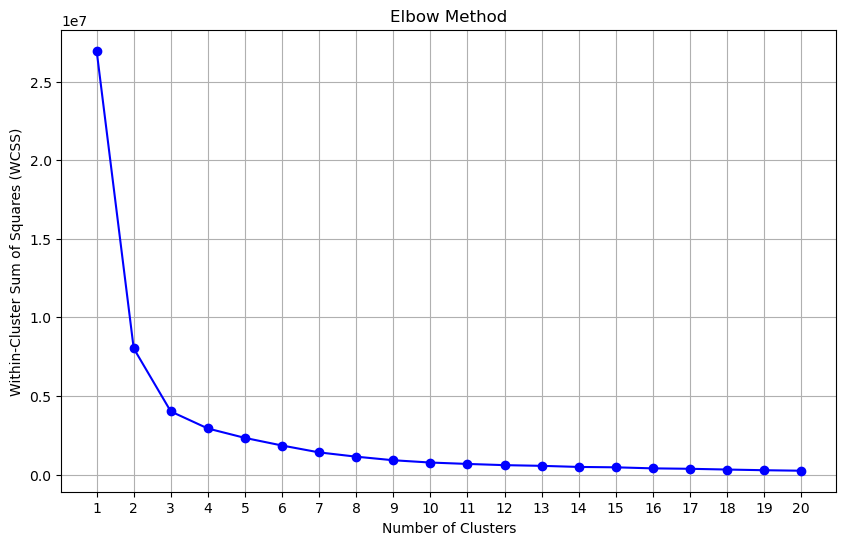

In [604]:
lat_and_lon = df[['latitude', 'longitude']]
max_clusters = 20
wcss = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(lat_and_lon)
    wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

### Convert latitude and Longitude to categorical data 

C:\Users\ureka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ureka\AppData\Local\Temp\ipykernel_3320\4207574652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_and_lon['zone_id'] = cluster_labels


       latitude  longitude  zone_id
0       33.8520  -118.3759        1
1       37.0867   -76.4941        0
2       35.8230   -78.6438        3
3       38.3622  -121.9712        1
4       35.1038  -106.6110        2
...         ...        ...      ...
99487   29.6151   -95.1998        2
99488   30.2254   -81.7579        3
99489   32.7379  -117.0914        1
99490   35.4158   -80.8451        3
99491   32.7379  -117.0914        1

[99383 rows x 3 columns]


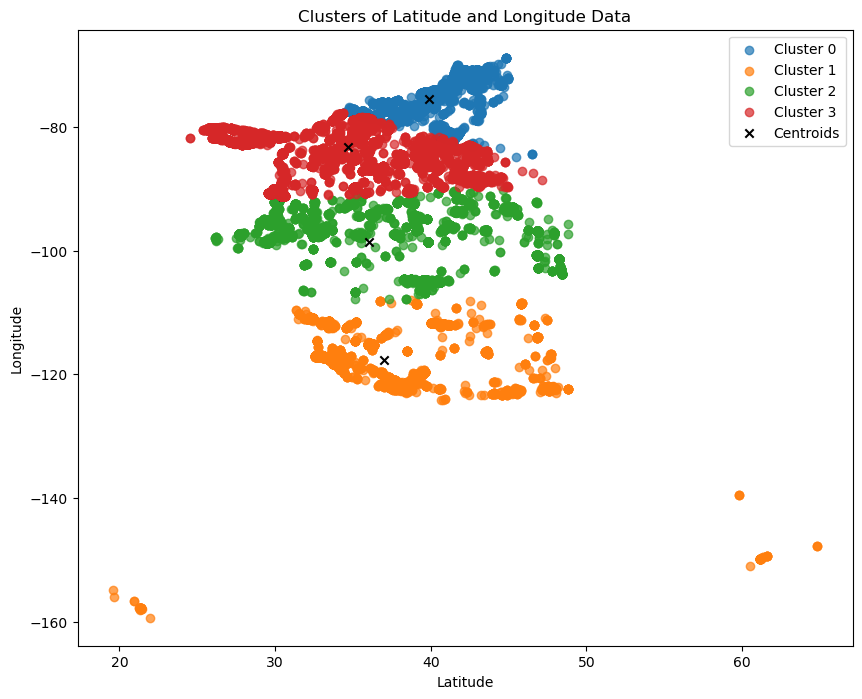

In [605]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#From the Elbow Method
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(lat_and_lon)
cluster_labels = kmeans.labels_
lat_and_lon['zone_id'] = cluster_labels
print(lat_and_lon)
df = df.merge(lat_and_lon[['zone_id']], left_index=True, right_index=True)

plt.figure(figsize=(10, 8))
for cluster_id in range(n_clusters):
    plt.scatter(lat_and_lon[lat_and_lon['zone_id'] == cluster_id]['latitude'], 
                lat_and_lon[lat_and_lon['zone_id'] == cluster_id]['longitude'], 
                label=f'Cluster {cluster_id}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='black', marker='x', label='Centroids')

plt.title('Clusters of Latitude and Longitude Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()


## Feature Removal

In [606]:
#Based on domain knowledge and common sense
df = df.drop(['id', 'title', 'body', 'currency', 'fee', 'price_display', 'price_type', 'source', 'time','latitude', 'longitude', 'category', 'address'], axis=1)


## Exploratory Data Analysis

In [607]:
print(df.columns)

Index(['amenities', 'bathrooms', 'bedrooms', 'has_photo', 'pets_allowed',
       'price', 'square_feet', 'cityname', 'state', 'zone_id'],
      dtype='object')


### 1. Distribution of Data in Each Feature and Price

In [608]:
categorical_features = ['cityname', 'state', 'amenities', 'pets_allowed', 'zone_id']
for feature in categorical_features:
    print(f"Distribution in {feature}:\n{df[feature].value_counts()}\n")

numerical_features = ['bathrooms', 'bedrooms', 'price', 'square_feet']
df[numerical_features].describe()


Distribution in cityname:
cityname
Dallas          2856
Denver          2750
Los Angeles     2429
Las Vegas       1846
Arlington       1577
                ... 
Flomaton           1
Murphysboro        1
Highwood           1
Brownwood          1
Willow Grove       1
Name: count, Length: 2980, dtype: int64

Distribution in state:
state
TX         11250
CA         10301
VA          8278
NC          6293
CO          6279
FL          5773
MD          5276
MA          5023
OH          4899
GA          4750
NJ          4444
NV          2813
WA          2595
AZ          2376
LA          1345
MO          1203
PA          1122
TN          1114
IL          1036
NE          1020
KY           995
OK           934
SC           908
KS           899
UT           809
ND           743
NH           735
MI           710
NY           659
AR           598
MN           581
CT           509
IN           509
WI           430
IA           372
AL           354
unknown      277
OR           277
VT           125
R

bathrooms      bedrooms         price   square_feet
count  99383.000000  99383.000000  99383.000000  99383.000000
mean       1.444367      1.725979   1527.163791    956.475232
std        0.548083      0.751275    904.439917    417.694854
min        0.000000      0.000000    100.000000    101.000000
25%        1.000000      1.000000   1014.000000    729.000000
50%        1.000000      2.000000   1350.000000    900.000000
75%        2.000000      2.000000   1795.000000   1115.000000
max        9.000000      9.000000  52500.000000  50000.000000

### 2. Distribution Visualization


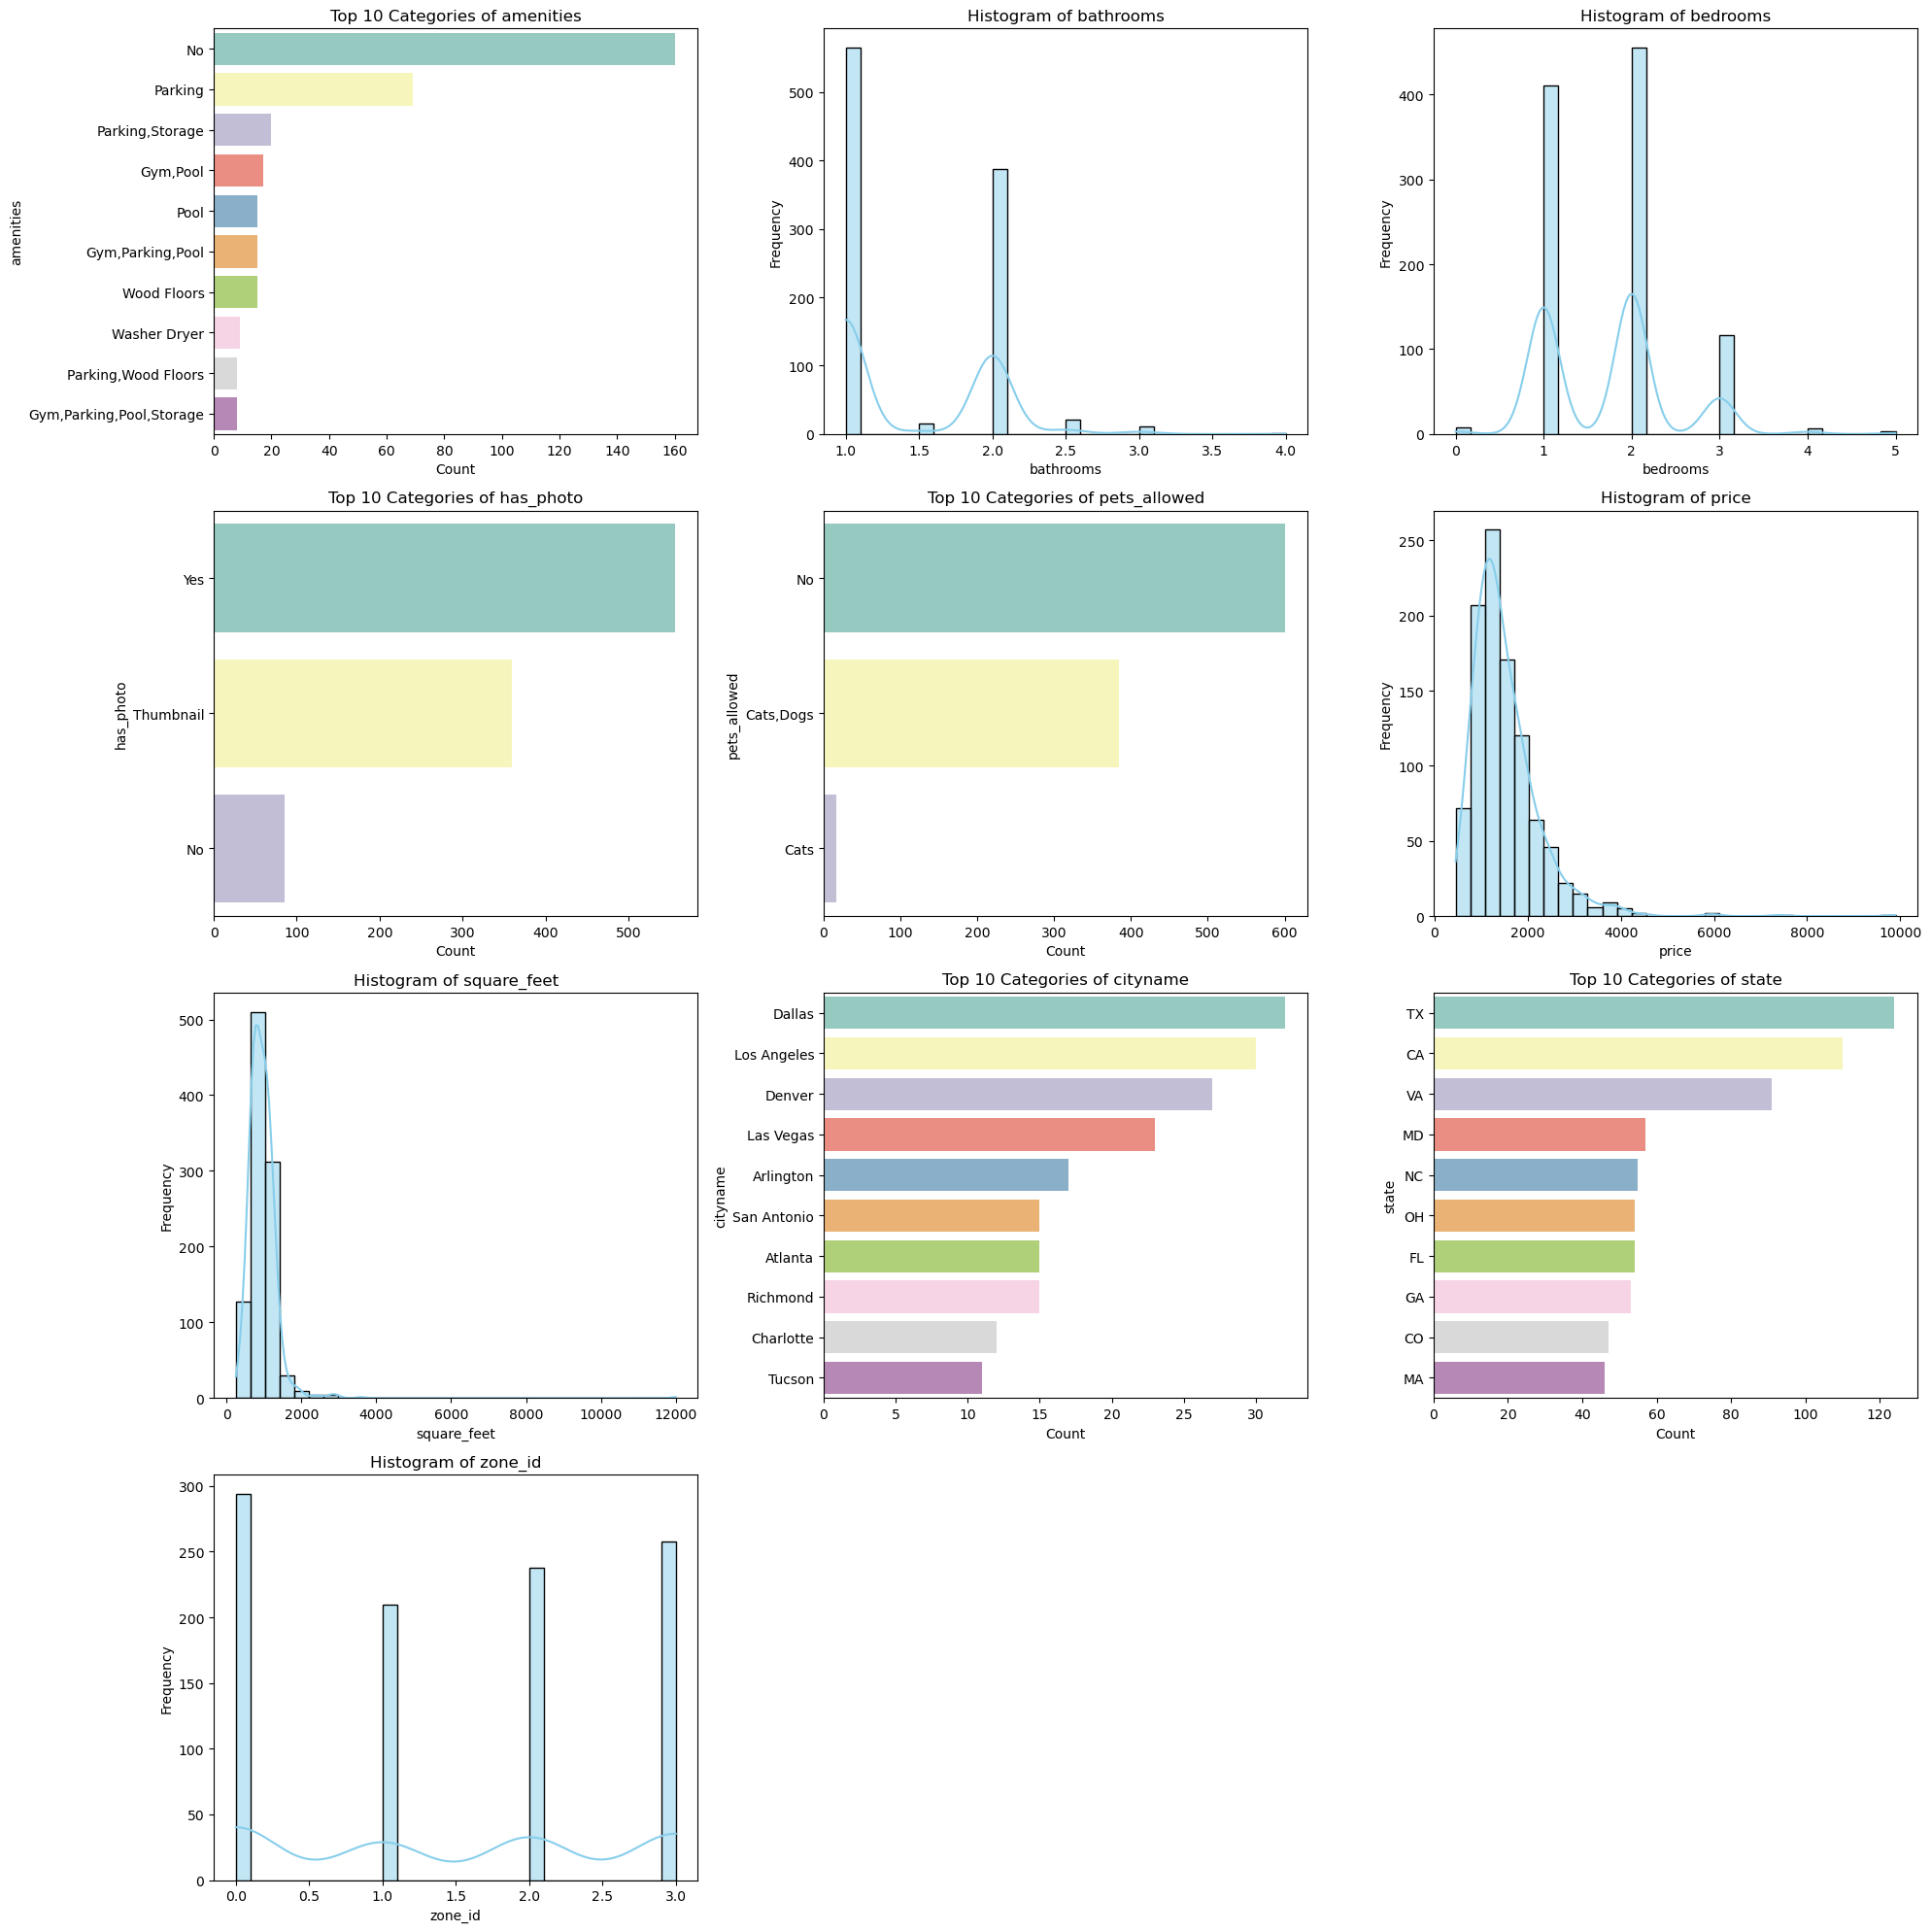

In [609]:
features_to_visualize = ['amenities', 'bathrooms', 'bedrooms', 
                         'has_photo', 'pets_allowed', 'price', 'square_feet', 
                         'cityname', 'state', 'zone_id']

top_categories_limit = 10

#columns and rows refer to the tiles of plots
columns_per_row = 3
rows_needed = (len(features_to_visualize) + columns_per_row - 1) // columns_per_row

# Sample size to reduce computation for large datasets
sample_size_for_visualization = 1000
df_visualization_sample = df.sample(n=sample_size_for_visualization, random_state=42)

plt.figure(figsize=(20, 5 * rows_needed))

for index, feature in enumerate(features_to_visualize, start=1):
    plt.subplot(rows_needed, columns_per_row, index)
    if df_visualization_sample[feature].dtype == 'object' or df_visualization_sample[feature].dtype == 'bool':
        # Filter categorical data to include only top categories
        top_categories = df_visualization_sample[feature].value_counts().nlargest(top_categories_limit).index
        data_for_top_categories = df_visualization_sample[df_visualization_sample[feature].isin(top_categories)]
        sns.countplot(y=data_for_top_categories[feature], palette='Set3', order=top_categories)
    else:
        # For numerical features, plot histogram
        sns.histplot(df_visualization_sample[feature], bins=30, kde=True, color='skyblue')

    plt.title(f'Top {top_categories_limit} Categories of {feature}' if df_visualization_sample[feature].dtype in ['object', 'bool'] else f'Histogram of {feature}')
    plt.xlabel('Count' if df_visualization_sample[feature].dtype in ['object', 'bool'] else feature)
    plt.ylabel(feature if df_visualization_sample[feature].dtype in ['object', 'bool'] else 'Frequency')

plt.tight_layout()
plt.show()


### 3. Correlation Between Apartment Features using heatmap


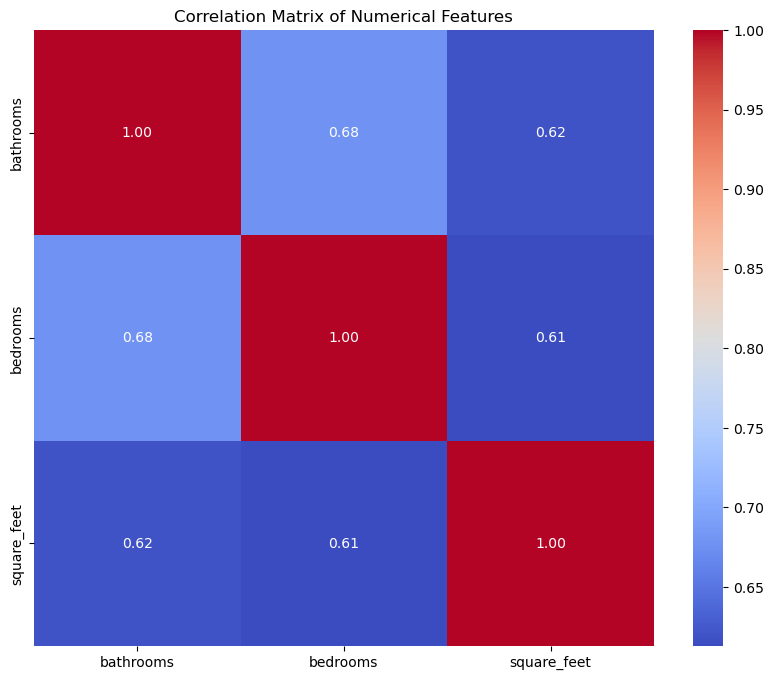

In [610]:
corr_matrix = df[['bathrooms', 'bedrooms', 'square_feet']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Encoding Categorical Variable 

### Check the number of unique values in categorical features 

In [611]:
for feature_name in categorical_features:
    unique_values_count = df[feature_name].nunique()
    print("Number of unique values in", feature_name, ":", unique_values_count)
    

Number of unique values in cityname : 2980
Number of unique values in state : 52
Number of unique values in amenities : 9824
Number of unique values in pets_allowed : 5
Number of unique values in zone_id : 4


### One hot encoding for the features with less than 10 categories 

In [612]:
df = pd.get_dummies(df, columns=['zone_id', 'has_photo'], drop_first=True, dtype=int)

# Transform pets allowed because the data is stored in array like form
df['pets_allowed'] = df['pets_allowed'].str.split(',')
unique_pets = set()
for pets_list in df['pets_allowed']:
    unique_pets.update(pets_list)

for pet in unique_pets:
    df[pet] = df['pets_allowed'].apply(lambda x: 1 if pet in x else 0)

df.drop(columns=['pets_allowed'], inplace=True)

### One hot encoding for top 10 categoris for amenities 

In [613]:
from collections import Counter

# Transform amenities because the data is stored in array like form 
df['amenities'] = df['amenities'].str.split(',')

# Aggregate counts of each pet across all lists to identify the top 10 most frequent pets
amenity_counter = Counter([amenity for sublist in df['amenities'] for amenity in sublist])
print(f"Number of unique items is {len(amenity_counter)}")
top_10_amenities = [amenity for amenity, count in amenity_counter.most_common(10)]

for amenity in top_10_amenities:
    df[f'amenity_{amenity}'] = df['amenities'].apply(lambda x: 1 if pet in x else 0)

df.drop(columns=['amenities'], inplace=True)


Number of unique items is 28


### Target encoding for city and state

In [614]:
mean_target_per_city = df.groupby('cityname')['price'].mean()
df['cityname_encoded'] = df['cityname'].map(mean_target_per_city)
mean_target_per_state = df.groupby('state')['price'].mean()
df['state_encoded'] = df['state'].map(mean_target_per_state)

df.drop(columns=['cityname', 'state'],inplace=True)

### Dataframe after data cleaning

In [615]:
print(df.sample(5))

       bathrooms  bedrooms   price  square_feet  zone_id_1  zone_id_2  \
63884        1.0       1.0   770.0          839          0          1   
87520        1.0       1.0  1299.0          580          0          0   
80688        1.0       1.0  1260.0          974          0          0   
95743        2.0       2.0  1709.0         1085          0          0   
63665        2.0       3.0  1271.0         1264          0          0   

       zone_id_3  has_photo_Thumbnail  has_photo_Yes  No  ...  amenity_Gym  \
63884          0                    0              1   1  ...            0   
87520          0                    0              1   1  ...            0   
80688          1                    1              0   1  ...            0   
95743          1                    0              1   1  ...            0   
63665          0                    1              0   0  ...            0   

       amenity_Patio/Deck  amenity_Washer Dryer  amenity_Storage  \
63884                   

## Splitting the Dataset

In [616]:
X = df.drop('price', axis=1)
y = df['price'].astype(float) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [617]:
# Number of trees in random forest. High value can improve the performance at the expence of computation time
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 6)]
# Number of features to consider at every split
# High value enable the model to caputre non-linear relationships better at the expense of overfitting
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree. 
# High value enable the model to caputre non-linear relationships better at the expense of overfitting
max_depth = [int(x) for x in np.linspace(10, 50, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
# Low value enable the model to caputre non-linear relationships better at the expense of overfitting
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# Low value enable the model to caputre non-linear relationships better at the expense of overfitting
min_samples_leaf = [1, 2, 4 ]
# Method of selecting samples for training each tree
# Bootstrapping allows the model to reduce the variance leading to less likely to be overfitted
bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap }
print(random_grid)

{'n_estimators': [1, 10, 20, 30, 40, 50], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 18, 26, 34, 42, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [618]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

print("Best parameters found:", rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


## Evaluating the performance on both training set and test set of the tuned model by comparing it to the base configulation model, and visualize feature importance

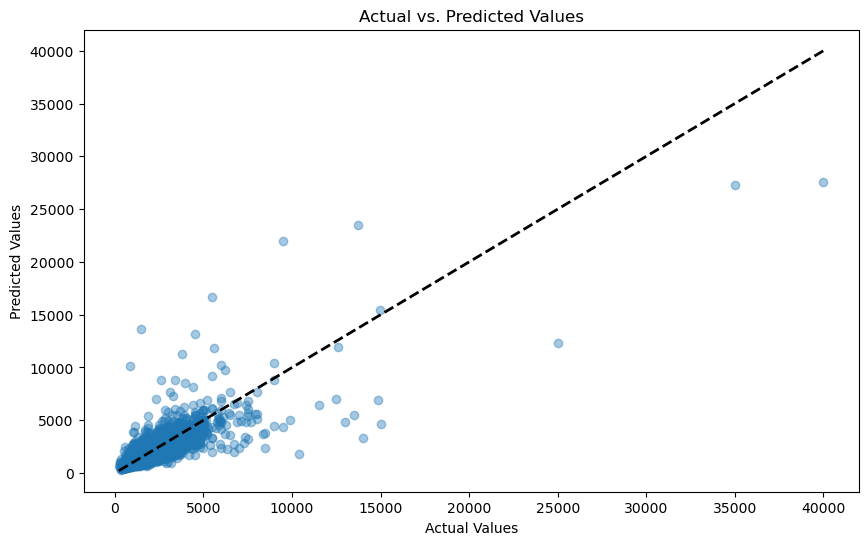

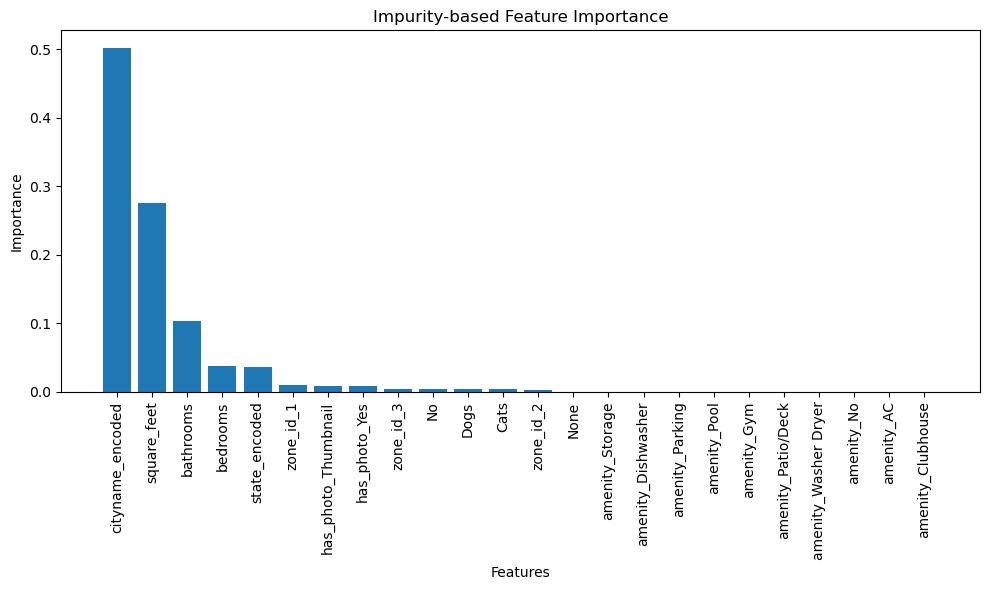

1. Feature: cityname_encoded, Importance: 0.5021624243078148
2. Feature: square_feet, Importance: 0.27556314447190855
3. Feature: bathrooms, Importance: 0.10344446224159945
4. Feature: bedrooms, Importance: 0.03701462629324079
5. Feature: state_encoded, Importance: 0.0363538894699129
6. Feature: zone_id_1, Importance: 0.00971681694299804
7. Feature: has_photo_Thumbnail, Importance: 0.008988842648139317
8. Feature: has_photo_Yes, Importance: 0.008775948081607874
9. Feature: zone_id_3, Importance: 0.004304927439557045
10. Feature: No, Importance: 0.004085875321217026
11. Feature: Dogs, Importance: 0.00348108032053212
12. Feature: Cats, Importance: 0.0033118021654072348
13. Feature: zone_id_2, Importance: 0.002796050647610202
14. Feature: None, Importance: 1.096484545865609e-07
15. Feature: amenity_Storage, Importance: 0.0
16. Feature: amenity_Dishwasher, Importance: 0.0
17. Feature: amenity_Parking, Importance: 0.0
18. Feature: amenity_Pool, Importance: 0.0
19. Feature: amenity_Gym, Impo

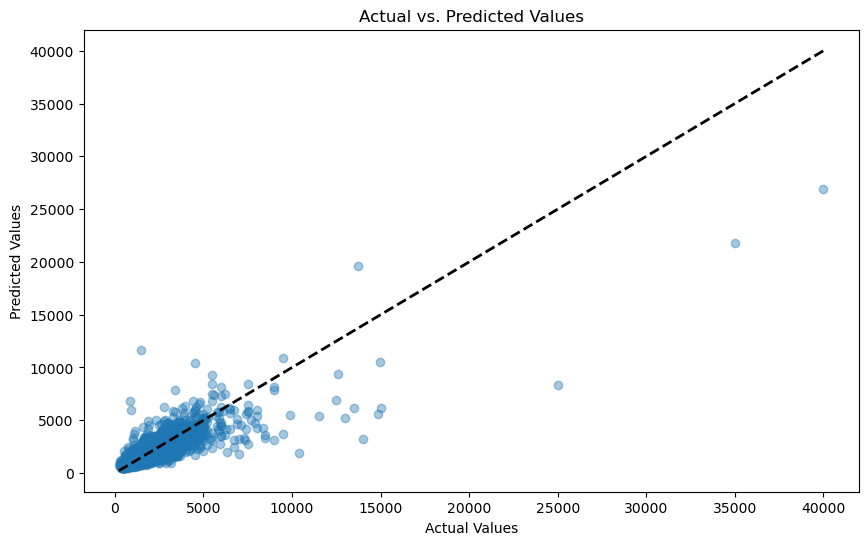

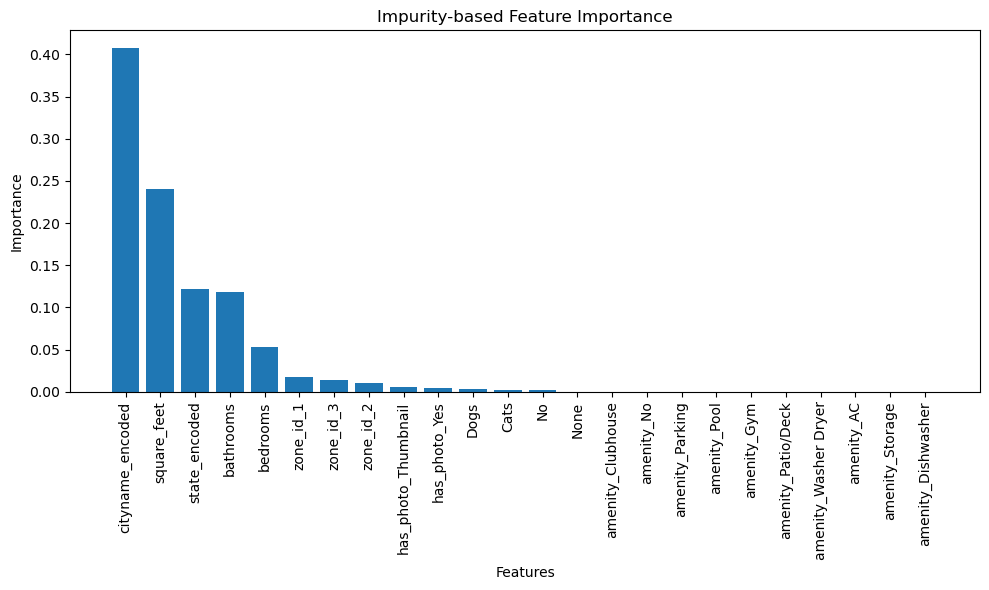

1. Feature: cityname_encoded, Importance: 0.40824320738233155
2. Feature: square_feet, Importance: 0.24067783573527848
3. Feature: state_encoded, Importance: 0.12212727544858579
4. Feature: bathrooms, Importance: 0.11784933006758366
5. Feature: bedrooms, Importance: 0.05295461004076711
6. Feature: zone_id_1, Importance: 0.017438610519581683
7. Feature: zone_id_3, Importance: 0.013328948083941314
8. Feature: zone_id_2, Importance: 0.010429792489598537
9. Feature: has_photo_Thumbnail, Importance: 0.005578978279330323
10. Feature: has_photo_Yes, Importance: 0.00409892379153079
11. Feature: Dogs, Importance: 0.0029311253663285687
12. Feature: Cats, Importance: 0.0022612892835049163
13. Feature: No, Importance: 0.0020782147003455894
14. Feature: None, Importance: 1.8588112916722666e-06
15. Feature: amenity_Clubhouse, Importance: 0.0
16. Feature: amenity_No, Importance: 0.0
17. Feature: amenity_Parking, Importance: 0.0
18. Feature: amenity_Pool, Importance: 0.0
19. Feature: amenity_Gym, Impo

In [619]:
def evaluate(name ,model, X_train, y_train, X_test, y_test):
    # Model performance metrics on training data
    # - Mean Absolute Error (MAE): Measures the average magnitude of errors in a set of predictions, without direction consideration.
    # - R-squared (R^2): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables, showing the goodness of fit.
    # - Mean Squared Error (MSE): Averages the squares of the differences between predicted and actual values, sensitive to outliers.
    # - Root Mean Squared Error (RMSE): The square root of MSE, providing a measure of the magnitude of prediction error.
    # - Mean Absolute Percentage Error (MAPE): The mean of the absolute percentage differences between predicted and actual values, offering a relative measure of error.
    # - Accuracy: Derived from MAPE, representing the model's average accuracy as a percentage, where higher values indicate better performance.

    train_predictions = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r_squared = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = sqrt(train_mse)
    train_errors = abs(train_predictions - y_train)
    train_mape = 100 * np.mean(train_errors / y_train)
    train_accuracy = 100 - train_mape
    
    test_predictions = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r_squared = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = sqrt(test_mse)
    test_errors = abs(test_predictions - y_test)
    test_mape = 100 * np.mean(test_errors / y_test)
    test_accuracy = 100 - test_mape
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, test_predictions, alpha=0.4)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
    plt.show()
    
    feature_importances = model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_feature_importances = feature_importances[sorted_indices]
    sorted_feature_names = X_train.columns[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
    plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Impurity-based Feature Importance')
    plt.tight_layout()
    plt.show()
    
    for i, idx in enumerate(sorted_indices):
        print(f"{i + 1}. Feature: {X_train.columns[idx]}, Importance: {feature_importances[idx]}")
        
    print("\nUnderstanding Model Performance Metrics:\n")
    print("1. Mean Absolute Error (MAE):")
    print("   - Measures the average magnitude of the errors between predicted and actual values, without considering their direction.")
    print("   - Lower MAE values indicate better model performance.\n")
    print("2. R-squared (R^2):")
    print("   - Indicates the proportion of the variance in the dependent variable that's predictable from the independent variables.")
    print("   - Values range from 0 to 1, with higher values indicating a better fit of the model to the data.\n")
    print("3. Mean Squared Error (MSE):")
    print("   - Averages the squares of the differences between predicted and actual values.")
    print("   - More sensitive to outliers than MAE, with lower values indicating better model performance.\n")
    print("4. Root Mean Squared Error (RMSE):")
    print("   - The square root of MSE, providing a measure of the magnitude of prediction error.")
    print("   - Lower RMSE values indicate better model performance, with the scale being more interpretable relative to the target variable.\n")
    print("5. Mean Absolute Percentage Error (MAPE):")
    print("   - Shows the mean of the absolute percentage differences between predicted and actual values, offering a relative measure of error.")
    print("   - Lower percentages indicate more accurate predictions.\n")
    print("6. Accuracy (derived from MAPE):")
    print("   - Represents how close the model's predictions are to the actual values, expressed as a percentage of accuracy.")
    print("   - Higher percentages indicate higher accuracy of predictions.\n")


    print(f'\n{name} Performance on Training Data: MAE = {train_mae:.4f}, R^2 = {train_r_squared:.4f}, RMSE = {train_rmse:.4f},  Accuracy = {train_accuracy:.2f}%')
    print(f'{name} Performance on Testing Data:MAE = {test_mae:.4f}, R^2 = {test_r_squared:.4f}, RMSE = {test_rmse:.4f}, Accuracy = {test_accuracy:.2f}%')
    
    metrics = {
        'train_mae': train_mae,
        'train_r_squared': train_r_squared,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_accuracy': train_accuracy,
        'test_mae': test_mae,
        'test_r_squared': test_r_squared,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_accuracy': test_accuracy
    }
    
    return metrics

baseline_model = RandomForestRegressor(n_estimators=10, random_state=42)
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate('Baseline Model', baseline_model, X_train, y_train, X_test, y_test)

best_random_model = rf_random.best_estimator_
best_random_metrics = evaluate('Best Random Model', best_random_model, X_train, y_train, X_test, y_test)

def compare_models_metrics(baseline_metrics, best_random_metrics):
    print("\n Metric Comparison (Baseline Model vs Best Random Model):")
    for key in baseline_metrics:
        difference = best_random_metrics[key] - baseline_metrics[key]
        print(f"{key}: Baseline = {baseline_metrics[key]:.4f}, Best Random = {best_random_metrics[key]:.4f}, Difference = {difference:.4f}")

compare_models_metrics(baseline_metrics, best_random_metrics)

### Drop features with Recursive Feature Elimination

In [620]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import numpy as np

# Number of features to select. I chose these number becuase I want to make sure that features are selected not weirdly like only including zone_id 1, and drop other zone ids
features_to_select = [5, 8, 13]

best_rmse = np.inf
best_n_features = None
best_model = None
best_selected_features = None

for n in features_to_select:
    rfe = RFE(estimator=best_random_model, n_features_to_select=n, step=1)
    
    rfe.fit(X_train, y_train)
    
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    model_after_rfe = RandomForestRegressor(n_estimators=10, random_state=42)
    model_after_rfe.fit(X_train_rfe, y_train)
    
    predictions = model_after_rfe.predict(X_test_rfe)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_features = n
        best_model = model_after_rfe
        best_selected_features = X_train.columns[rfe.support_]
        
print(f"Best number of features: {best_n_features} with RMSE: {best_rmse:.4f}")
print(f"Selected features for the best model: {best_selected_features}")

predictions_best = best_model.predict(X_test[best_selected_features])
mae_best = mean_absolute_error(y_test, predictions_best)
r_squared_best = r2_score(y_test, predictions_best)
mse_best = mean_squared_error(y_test, predictions_best)
rmse_best = sqrt(mse_best)
errors_best = abs(predictions_best - y_test)
mape_best = 100 * np.mean(errors_best / y_test)
accuracy_best = 100 - mape_best

print(f"\nBest Model Performance Metrics:")
print(f"Mean Absolute Error (MAE) after RFE: {mae_best:.4f}")
print(f"Mean Squared Error (MSE) after RFE: {mse_best:.4f}")
print(f"Root Mean Squared Error (RMSE) after RFE: {rmse_best:.4f}")
print(f"R-squared (R²) after RFE: {r_squared_best:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) after RFE: {mape_best:.2f}%")
print(f"Accuracy after RFE: {accuracy_best:.2f}%")


Best number of features: 5 with RMSE: 457.9647
Selected features for the best model: Index(['bathrooms', 'bedrooms', 'square_feet', 'cityname_encoded',
       'state_encoded'],
      dtype='object')

Best Model Performance Metrics:
Mean Absolute Error (MAE) after RFE: 199.5025
Mean Squared Error (MSE) after RFE: 209731.6230
Root Mean Squared Error (RMSE) after RFE: 457.9647
R-squared (R²) after RFE: 0.7385
Mean Absolute Percentage Error (MAPE) after RFE: 12.68%
Accuracy after RFE: 87.32%


C:\Users\ureka\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Furthur improving hyperparameters

In [621]:
# Number of trees in random forest. High value can improve the performance at the expence of computation time
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 6)] # Increase the ceiling 
# Number of features to consider at every split
# High value enable the model to caputre non-linear relationships better at the expense of overfitting
max_features = [0.1, 0.25, 0.5,'log2', 'sqrt'] # Added variation
# Maximum number of levels in tree. 
# High value enable the model to caputre non-linear relationships better at the expense of overfitting
max_depth = [int(x) for x in np.linspace(1, 20, num = 6)] # eliminated None to ensure ceiling is 20
# Minimum number of samples required to split a node
# Low value enable the model to caputre non-linear relationships better at the expense of overfitting
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# Low value enable the model to caputre non-linear relationships better at the expense of overfitting
min_samples_leaf = [1, 2, 4 ]
# Method of selecting samples for training each tree
# Bootstrapping allows the model to reduce the variance leading to less likely to be overfitted
bootstrap = [True]
# Number of samples 
# High value enable the model to caputre non-linear relationships better at the expense of overfitting
max_samples = [0.5, 0.75, 1.0, None] # Added this to try even more paramaters 

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'max_samples': max_samples
}

print(random_grid)

{'n_estimators': [1, 20, 40, 60, 80, 100], 'max_features': [0.1, 0.25, 0.5, 'log2', 'sqrt'], 'max_depth': [1, 4, 8, 12, 16, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True], 'max_samples': [0.5, 0.75, 1.0, None]}


## Evaluating the performance on both training set and test set of the tuned model by comparing it to the base configulation model again

In [622]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_filtered, y_train)
rf_random.best_params_

print("Best parameters found:", rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


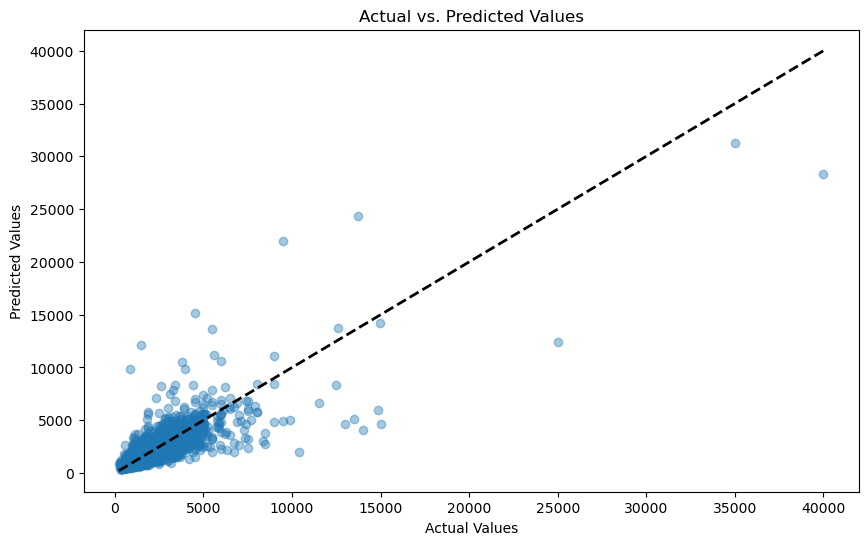


Understanding Model Performance Metrics:

1. Mean Absolute Error (MAE):
   - Measures the average magnitude of the errors between predicted and actual values, without considering their direction.
   - Lower MAE values indicate better model performance.

2. R-squared (R^2):
   - Indicates the proportion of the variance in the dependent variable that's predictable from the independent variables.
   - Values range from 0 to 1, with higher values indicating a better fit of the model to the data.

3. Mean Squared Error (MSE):
   - Averages the squares of the differences between predicted and actual values.
   - More sensitive to outliers than MAE, with lower values indicating better model performance.

4. Root Mean Squared Error (RMSE):
   - The square root of MSE, providing a measure of the magnitude of prediction error.
   - Lower RMSE values indicate better model performance, with the scale being more interpretable relative to the target variable.

5. Mean Absolute Percentage Error (MAP

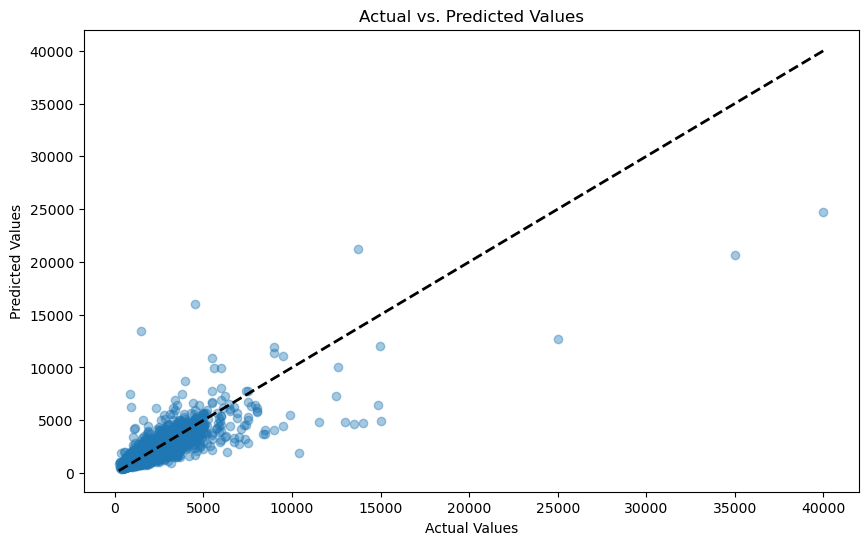


Understanding Model Performance Metrics:

1. Mean Absolute Error (MAE):
   - Measures the average magnitude of the errors between predicted and actual values, without considering their direction.
   - Lower MAE values indicate better model performance.

2. R-squared (R^2):
   - Indicates the proportion of the variance in the dependent variable that's predictable from the independent variables.
   - Values range from 0 to 1, with higher values indicating a better fit of the model to the data.

3. Mean Squared Error (MSE):
   - Averages the squares of the differences between predicted and actual values.
   - More sensitive to outliers than MAE, with lower values indicating better model performance.

4. Root Mean Squared Error (RMSE):
   - The square root of MSE, providing a measure of the magnitude of prediction error.
   - Lower RMSE values indicate better model performance, with the scale being more interpretable relative to the target variable.

5. Mean Absolute Percentage Error (MAP

In [623]:
def evaluate_filtered(name, model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r_squared = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = sqrt(train_mse)
    train_errors = abs(train_predictions - y_train)
    train_mape = 100 * np.mean(train_errors / y_train)
    train_accuracy = 100 - train_mape
    
    test_predictions = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r_squared = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = sqrt(test_mse)
    test_errors = abs(test_predictions - y_test)
    test_mape = 100 * np.mean(test_errors / y_test)
    test_accuracy = 100 - test_mape
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, test_predictions, alpha=0.4)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
    plt.show()
    
    print("\nUnderstanding Model Performance Metrics:\n")
    print("1. Mean Absolute Error (MAE):")
    print("   - Measures the average magnitude of the errors between predicted and actual values, without considering their direction.")
    print("   - Lower MAE values indicate better model performance.\n")
    print("2. R-squared (R^2):")
    print("   - Indicates the proportion of the variance in the dependent variable that's predictable from the independent variables.")
    print("   - Values range from 0 to 1, with higher values indicating a better fit of the model to the data.\n")
    print("3. Mean Squared Error (MSE):")
    print("   - Averages the squares of the differences between predicted and actual values.")
    print("   - More sensitive to outliers than MAE, with lower values indicating better model performance.\n")
    print("4. Root Mean Squared Error (RMSE):")
    print("   - The square root of MSE, providing a measure of the magnitude of prediction error.")
    print("   - Lower RMSE values indicate better model performance, with the scale being more interpretable relative to the target variable.\n")
    print("5. Mean Absolute Percentage Error (MAPE):")
    print("   - Shows the mean of the absolute percentage differences between predicted and actual values, offering a relative measure of error.")
    print("   - Lower percentages indicate more accurate predictions.\n")
    print("6. Accuracy (derived from MAPE):")
    print("   - Represents how close the model's predictions are to the actual values, expressed as a percentage of accuracy.")
    print("   - Higher percentages indicate higher accuracy of predictions.\n")

    
    print(f'{name} Performance on Training Data: MAE = {train_mae:.4f}, R^2 = {train_r_squared:.4f}, RMSE = {train_rmse:.4f},  Accuracy = {train_accuracy:.2f}%')
    print(f'{name} Performance on Testing Data:MAE = {test_mae:.4f}, R^2 = {test_r_squared:.4f}, RMSE = {test_rmse:.4f}, Accuracy = {test_accuracy:.2f}%')
    
    metrics = {
        'train_mae': train_mae,
        'train_r_squared': train_r_squared,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_mape': train_mape,
        'train_accuracy': train_accuracy,
        'test_mae': test_mae,
        'test_r_squared': test_r_squared,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_mape': test_mape,
        'test_accuracy': test_accuracy
    }
    return metrics

baseline_model = RandomForestRegressor(n_estimators=10, random_state=42)
baseline_model.fit(X_train_filtered, y_train)  
baseline_metrics= evaluate_filtered('Baseline Model',baseline_model, X_train_filtered, y_train, X_test_filtered, y_test)

best_random_model = rf_random.best_estimator_
best_random_model.fit(X_train_filtered, y_train)
best_random_metrics = evaluate_filtered('Best Random Model', best_random_model, X_train_filtered, y_train, X_test_filtered, y_test)

def compare_models_metrics(baseline_metrics, best_random_metrics):
    print("\n Metric Comparison (Baseline Model vs Best Random Model):")
    for key in baseline_metrics:
        difference = best_random_metrics[key] - baseline_metrics[key]
        print(f"{key}: Baseline = {baseline_metrics[key]:.4f}, Best Random = {best_random_metrics[key]:.4f}, Difference = {difference:.4f}")

compare_models_metrics(baseline_metrics, best_random_metrics)


## User InterFace

In [624]:
print(best_random_model.feature_names_in_)

['bathrooms' 'bedrooms' 'square_feet' 'cityname_encoded' 'state_encoded']


In [625]:
from IPython.display import display, clear_output

bathrooms = widgets.FloatText(value=1.0, description='Bathrooms:', style={'description_width': 'initial'})
bedrooms = widgets.FloatText(value=1.0, description='Bedrooms:', style={'description_width': 'initial'})
square_feet = widgets.IntText(value=500, description='Square Feet:', style={'description_width': 'initial'})
cityname = widgets.Text(value='', description='City:', style={'description_width': 'initial'})

# Enforce proper input
states_list = sorted([
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
])

state = widgets.Dropdown(options=states_list, value='HI', description='State:', style={'description_width': 'initial'})

cityname_to_encoded = mean_target_per_city.to_dict()
state_to_encoded = mean_target_per_state.to_dict()

predict_btn = widgets.Button(description="Predict")

output = widgets.Output()

def on_predict_btn_clicked(b):
    city_title_case = cityname.value.title() 
    with output:
        clear_output(wait=True)
        # Enforce proper input
        if city_title_case in cityname_to_encoded:
            cityname_encoded = cityname_to_encoded[city_title_case]
            state_encoded = state_to_encoded[state.value]

            feature_columns = ['bathrooms', 'bedrooms', 'square_feet', 'cityname_encoded', 'state_encoded']

            new_data_df = pd.DataFrame([[
                bathrooms.value, bedrooms.value, square_feet.value, cityname_encoded, state_encoded
            ]], columns=feature_columns)

            prediction = best_random_model.predict(new_data_df)
            
            print(f"Predicted Value: {prediction[0]}")
        else:
            print(f"'{cityname.value}' not found. Please enter a valid city.")

predict_btn.on_click(on_predict_btn_clicked)

input_widgets = widgets.VBox([bathrooms, bedrooms, square_feet, cityname, state, predict_btn])
display(input_widgets, output)

Output()